## 1. Install and import required Libararies
We get secret key after signing up to QausalAI

In [1]:
!pip install -qq matplotlib
!pip install -qq scikit-learn
!pip install -qq pandas
!pip install -qq mmanager

In [2]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
 
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
# LOAD YOUR SECRET KEY AND BASE URL
import json
y=json.load(open('secret_key.json'))
secret_key=y['qausal_key']
url=y['base_url']

## 2. Load and Preprocess the Data: 

In [4]:
cal_housing = fetch_california_housing()
 
# split 80/20 train-test
X_train, X_test, y_train, y_test = train_test_split(cal_housing.data,
                                                    cal_housing.target,
                                                    test_size=0.2)


In [5]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(16512, 8) (4128, 8) (16512,) (4128,)


In [6]:
cal_housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [7]:
cal_housing.target_names

['MedHouseVal']

<b> Create train, test, actual datasets for modelManager:</b>

In [8]:
train=pd.DataFrame(X_train,columns=cal_housing.feature_names)
train['MedHouseVal']=y_train
train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,6.1388,30.0,5.930269,1.003170,1721.0,2.727417,37.33,-121.98,3.024
1,2.8000,34.0,4.553531,0.972665,2391.0,5.446469,34.28,-118.42,1.443
2,4.5179,25.0,5.401180,1.017699,809.0,2.386431,33.81,-118.01,1.771
3,3.1361,16.0,5.339332,0.997429,1155.0,2.969152,40.09,-122.38,0.848
4,0.4999,52.0,2.600000,0.733333,74.0,1.644444,33.93,-118.28,0.906
...,...,...,...,...,...,...,...,...,...
16507,2.8042,19.0,3.935849,1.084906,1701.0,3.209434,34.41,-119.70,2.361
16508,6.6635,14.0,7.500808,1.025040,3565.0,2.879645,33.94,-117.37,2.196
16509,3.6435,18.0,3.258065,1.072581,866.0,1.745968,33.89,-117.88,1.191
16510,2.5329,31.0,4.055639,1.037594,2220.0,3.338346,36.67,-121.62,1.352


In [9]:
test=pd.DataFrame(X_test,columns=cal_housing.feature_names)
test['MedHouseVal']=y_test
test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,5.6233,21.0,6.605114,1.041193,2014.0,2.860795,37.03,-122.03,3.220
1,1.9336,38.0,4.246014,1.173121,1768.0,4.027335,34.05,-118.31,1.906
2,4.1451,26.0,5.906318,1.106754,1372.0,2.989107,33.72,-118.31,3.267
3,2.1383,31.0,3.334495,1.027875,1300.0,4.529617,34.06,-118.04,1.534
4,2.4952,32.0,4.001235,1.104938,1592.0,1.965432,34.10,-117.72,1.818
...,...,...,...,...,...,...,...,...,...
4123,3.9261,23.0,5.448393,1.020305,1299.0,2.197970,38.46,-122.71,2.133
4124,2.8375,21.0,5.286396,1.155131,1792.0,4.276850,34.09,-117.95,1.665
4125,2.2019,13.0,4.333333,1.150463,1927.0,4.460648,34.25,-118.40,1.342
4126,1.3750,20.0,4.100000,1.800000,94.0,9.400000,38.91,-122.71,0.550


In [10]:
actual=test[['MedHouseVal']]
actual

,MedHouseVal
0,3.220
1,1.906
2,3.267
3,1.534
4,1.818
...,...
4123,2.133
4124,1.665
4125,1.342
4126,0.550


<b>Scale the Data</b>

In [11]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 3. Create a Random Forest Model 

In [12]:
# Set the model parameters
n_estimators = 100
max_depth = 6
max_features = 3

# Create and train model
rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features)
rf.fit(X_train, y_train)

# Use the model to make predictions on the test dataset.
predictions = rf.predict(X_test)

In [13]:
predictions

array([2.87436355, 1.38748657, 2.04088692, ..., 1.42390185, 1.08702346,
       2.21026652])

In [14]:
preds=pd.DataFrame(predictions,columns=['MedHouseVal'])
preds

,MedHouseVal
0,2.874364
1,1.387487
2,2.040887
3,1.457391
4,1.976654
...,...
4123,2.124320
4124,1.504043
4125,1.423902
4126,1.087023


In [15]:
# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print(mse)

0.39083607501613254


In [16]:
# SAVE THE MODEL
import pickle
pickle.dump(rf, open('model_california_housing.pkl', 'wb'))
 
# some time later...
 
# load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))

<b>Review the feature Importance determined by the Model:</b>

In [17]:
feature_importances = pd.DataFrame(rf.feature_importances_, 
                                   index=cal_housing.feature_names, columns=['importance'])
feature_importances.sort_values('importance', ascending=False)

,importance
MedInc,0.561174
AveOccup,0.124401
Latitude,0.102014
AveRooms,0.096580
Longitude,0.069629
HouseAge,0.035405
AveBedrms,0.007728
Population,0.003070


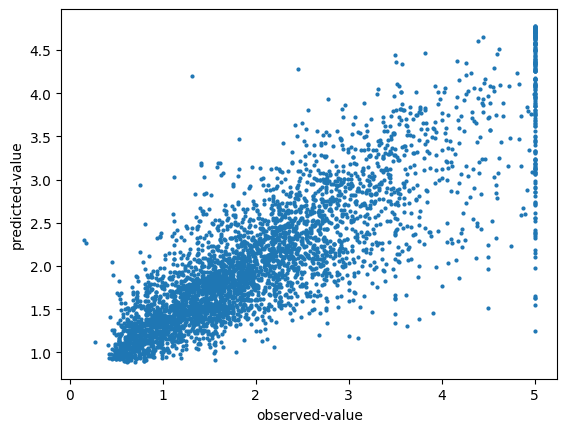

In [18]:
plt.plot(y_test,predictions,"o", markersize=2)
plt.xlabel("observed-value")
plt.ylabel("predicted-value")
plt.show()

## 4. Model Governance (ModelManager)

In [19]:
# SAVE THE REQUIRED DATA INTO CSV FILES
train.to_csv('Train_California_housing.csv',index=False)
test.to_csv('Test_California_housing.csv',index=False)
actual.to_csv('Actual_California_housing.csv',index=False)
preds.to_csv('Preds_California_housing.csv',index=False)

In [23]:
# ADD PROJECT/USECASE:
from mmanager.mmanager import Usecase
data = {
    "name": "California Housing Dataset-testtest3",
    "author": "bishow",
    "description": "California Housing Dataset",
    "source": "UsecasSource",
    "contributor": "UsecaseContributor",
    "transparency": True,
    "usecase_type":"Regression",
    "image": 'CaliforniaHousing.jpg' , #path to image file
    "banner": 'CaliforniaHousing.jpg' , #path to banner file
  }
try:
    x = Usecase(secret_key,url).post_usecase(data)
    print(x.json())
except Exception as e:
    print(str(e))

INFO:2023-05-05 14:59:08,502:mmanager.log_keeper:Post usecase succeed with status code 201


{'id': 162, 'author': 'bishow', 'created': '2023-05-05T01:25:28.164167-07:00', 'performance_valid': False, 'name': 'California Housing Dataset-testtest3', 'usecase_type': 'Regression', 'computing_type': '', 'description': 'California Housing Dataset', 'source': 'UsecasSource', 'contributor': 'UsecaseContributor', 'image': 'https://sandbox.qausal.ai/media/project/CaliforniaHousing_0W4V6eY.jpg', 'banner': 'https://sandbox.qausal.ai/media/project/CaliforniaHousing_1m2sQuY.jpg', 'is_private': False, 'userdefined_performance': False, 'transparency': True, 'trustability': False, 'explainability': False, 'wit_template_path': None, 'forecasting_template': None, 'notification_emails': [], 'hide_model': False, 'forecasting_db': None, 'table_act': None, 'table_preds': None, 'table_daily_pred': None, 'table_stats': None, 'table_fac_name': None, 'table_metrics': None, 'remote_tables': {}, 'sync_dates': {}, 'series': None, 'condition_one': None, 'condition_two': None, 'condition_three': None, 'condi

In [4]:
# GET ALL USECASE UPLOATED BY AUTHENTICATED USER
from mmanager.mmanager import Usecase
usecases = Usecase(secret_key,url).get_usecases()
print(usecases.json())

[{"id": 163, "name": "Commodity Price Forecasting (Brent Oil)", "type": "Forecasting"}, {"id": 157, "name": "Delay Prediction in Supply Chain", "type": "Classification"}, {"id": 154, "name": "California Housing Dataset", "type": "Regression"}]


In [16]:
# EDIT PROJECT/USECASE:
from mmanager.mmanager import Usecase
project_id = 161 #use model_id number to update
data = {
    "name": "California Housing Dataset-testupdated",
    "author": "bishow",
    "description": "California Housing Dataset",
    "source": "UsecasSource",
    "contributor": "UsecaseContributor",
    "transparency": True,
    "usecase_type":"Regression",
    "image": 'CaliforniaHousing.jpg' , #path to image file
    "banner": 'CaliforniaHousing.jpg' , #path to banner file
  }
# Usecase(secret_key, url).post_usecase(data)
x=Usecase(secret_key, url).patch_usecase(data, project_id)
print(x.json())

INFO:2023-05-05 14:56:55,303:mmanager.log_keeper:Update usecase succeed with status code 200


{'id': 161, 'author': 'bishow', 'created': '2023-05-05T01:25:34.603627-07:00', 'performance_valid': False, 'name': 'California Housing Dataset-testupdated', 'usecase_type': 'Regression', 'computing_type': '', 'description': 'California Housing Dataset', 'source': 'UsecasSource', 'contributor': 'UsecaseContributor', 'image': 'https://sandbox.qausal.ai/media/project/CaliforniaHousing_e4OVVBm.jpg', 'banner': 'https://sandbox.qausal.ai/media/project/CaliforniaHousing_4OPknAV.jpg', 'is_private': False, 'userdefined_performance': False, 'transparency': True, 'trustability': False, 'explainability': False, 'wit_template_path': None, 'forecasting_template': None, 'notification_emails': [], 'hide_model': False, 'forecasting_db': None, 'table_act': None, 'table_preds': None, 'table_daily_pred': None, 'table_stats': None, 'table_fac_name': None, 'table_metrics': None, 'remote_tables': {}, 'sync_dates': {}, 'series': None, 'condition_one': None, 'condition_two': None, 'condition_three': None, 'con

In [19]:
# DELETE USECASE
from mmanager.mmanager import Usecase
project_id = 161 #use project_id number to delete
Usecase(secret_key,url).delete_usecase(project_id)

In [5]:
# GET USE-CASE DETAILS
from mmanager.mmanager import Usecase
usecase_id = 154
usecase_detail = Usecase(secret_key,url).get_detail(usecase_id)
print(usecase_detail.json())

{'id': 154, 'author': 'bishow', 'created': '2023-05-01T07:47:19.120155-07:00', 'performance_valid': False, 'name': 'California Housing Dataset', 'usecase_type': 'Regression', 'computing_type': '', 'description': 'California Housing Dataset', 'source': 'UsecasSource', 'contributor': 'UsecaseContributor', 'image': 'https://sandbox.qausal.ai/media/project/CaliforniaHousing_VEp6HIT.jpg', 'banner': 'https://sandbox.qausal.ai/media/project/CaliforniaHousing_Pkgenig.jpg', 'is_private': False, 'userdefined_performance': False, 'transparency': True, 'trustability': False, 'explainability': False, 'wit_template_path': None, 'forecasting_template': None, 'notification_emails': [], 'hide_model': False, 'forecasting_db': None, 'table_act': None, 'table_preds': None, 'table_daily_pred': None, 'table_stats': None, 'table_fac_name': None, 'table_metrics': None, 'remote_tables': {}, 'sync_dates': {}, 'series': None, 'condition_one': None, 'condition_two': None, 'condition_three': None, 'condition_four'

In [6]:
# LIST ALL MODEL-ID REGISTERED UNDER USECASE:
from mmanager.mmanager import Usecase
usecase_id = 154
model_list = Usecase(secret_key,url).get_models(usecase_id)
print(model_list.json())

[253, 271, 269, 272, 255, 251, 257, 274, 252, 254]


In [24]:
# ADD MODEL: NO ML INTEGRATION

from mmanager.mmanager import Model
# path = '/content/' #path to csv file

model_data = {
    "project": 162, #Project ID or Usecase ID
    "transformerType": "Regression", #Options: Classification, Regression, Forcasting
    "training_dataset": "Train_California_housing.csv", #path to csv file
    "test_dataset": "Test_California_housing.csv", #path to csv file
    "pred_dataset": "Preds_California_housing.csv", #path to csv file
    "actual_dataset": "Actual_California_housing.csv", #path to csv file
    "model_file_path": "", #path to model file
    "target_column": "MedHouseVal", #Target Column
    "note": "California Housing", #Short description of Model
    "model_area": "finance",
    "model_dependencies": "no",
    "model_usage": "california housing",
    "model_audjustment": "",
    "model_developer": "bishow",
    "model_approver": "bishow",
    "model_maintenance": "maintenance",
}
x=Model(secret_key, url).post_model(model_data)
print(x.json())

INFO:2023-05-05 14:59:15,376:mmanager.log_keeper:Model creation succeed with status code 201


{'id': 273, 'model_alias': None, 'transformerType': 'Regression', 'description': None, 'language': 'Python', 'algorithmType': '', 'modelFramework': 'Scikit Learn', 'scoring_file_path': None, 'model_image_path': None, 'model_summary_path': None, 'weight': None, 'health': False, 'plan': False, 'datasetinsertionType': 'Manual', 'model_file_path': None, 'training_dataset': 'https://sandbox.qausal.ai/media/transformer/162/273/datasets/Train_California_housing.csv', 'test_dataset': 'https://sandbox.qausal.ai/media/transformer/162/273/datasets/Test_California_housing.csv', 'pred_dataset': 'https://sandbox.qausal.ai/media/transformer/162/273/datasets/Preds_California_housing.csv', 'actual_dataset': 'https://sandbox.qausal.ai/media/transformer/162/273/datasets/Actual_California_housing.csv', 'modelName': None, 'registryOption': None, 'amlCred': None, 'dataPath': None, 'fetchOption': None, 'externaldb': None, 'target_column': 'MedHouseVal', 'note': 'California Housing', 'model_area': 'finance', 

In [26]:
# UPDATE MODEL: 
from mmanager.mmanager import Model
model_id = 273 #use model_id number to update
data = {
		"transformerType": "Regression",
		"target_column": "MedHouseVal",
		"note": "California",
		"model_area": "Finance",
		"model_dependencies": "api script Model",
		"model_usage": "api script Model",
		"model_audjustment": "api script Model",
		"model_developer": "api script Model",
		"model_approver": "api script Model",
		"model_maintenance": "api script Model",
		"documentation_code": "api script Model",
		"implementation_plateform": "api script Model",
		"training_dataset": "Train_California_housing.csv", #path to csv file
		"pred_dataset": "Preds_California_housing.csv", #path to csv file
		"actual_dataset": "Actual_California_housing.csv", #path to csv file
		"test_dataset": "Test_California_housing.csv", #path to csv file
		"model_file_path":"",
	    "scoring_file_path":"",
		"model_image_path":"CaliforniaHousing.jpg" ,
    	"model_summary_path":"",
	}
x=Model(secret_key, url).patch_model(data, model_id)
print(x.json())

INFO:2023-05-05 14:59:59,303:mmanager.log_keeper:Update model succeed with status code 200


{'id': 273, 'model_alias': None, 'transformerType': 'Regression', 'description': None, 'language': 'Python', 'algorithmType': '', 'modelFramework': 'Scikit Learn', 'scoring_file_path': None, 'model_image_path': 'https://sandbox.qausal.ai/media/transformer/162/273/CaliforniaHousing.jpg', 'model_summary_path': None, 'weight': None, 'health': False, 'plan': False, 'datasetinsertionType': 'Manual', 'model_file_path': None, 'training_dataset': 'https://sandbox.qausal.ai/media/transformer/162/273/datasets/Train_California_housing_Io3nP0p.csv', 'test_dataset': 'https://sandbox.qausal.ai/media/transformer/162/273/datasets/Test_California_housing_JWZ4YfA.csv', 'pred_dataset': 'https://sandbox.qausal.ai/media/transformer/162/273/datasets/Preds_California_housing_cJfmhZF.csv', 'actual_dataset': 'https://sandbox.qausal.ai/media/transformer/162/273/datasets/Actual_California_housing_jhHlEN8.csv', 'modelName': None, 'registryOption': None, 'amlCred': None, 'dataPath': None, 'fetchOption': None, 'ext

In [27]:
# DELETE MODEL: 
from mmanager.mmanager import Model
model_id = 273 #use model_id number to delete
Model(secret_key,url).delete_model(model_id)

INFO:2023-05-05 15:00:15,910:mmanager.log_keeper:Delete model succeed with status code 204


<Response [204]>

In [8]:
# LIST ALL MODEL-ID REGISTERED UNDER USECASE:
from mmanager.mmanager import Usecase
usecase_id = 154
model_list = Usecase(secret_key,url).get_models(usecase_id)
print(model_list.json())

[253, 271, 269, 272, 255, 251, 257, 274, 252, 254]


In [9]:
# GET MODEL DETAILS:

from mmanager.mmanager import Model
model_id = 251
detail=Model(secret_key,url).get_details(model_id)
print(detail.json())

{'id': 251, 'model_alias': None, 'transformerType': 'Regression', 'description': None, 'language': 'Python', 'algorithmType': '', 'modelFramework': 'Scikit Learn', 'scoring_file_path': None, 'model_image_path': None, 'model_summary_path': None, 'weight': None, 'health': False, 'plan': False, 'datasetinsertionType': 'Manual', 'model_file_path': None, 'training_dataset': 'https://sandbox.qausal.ai/media/transformer/154/251/datasets/Train_California_housing.csv', 'test_dataset': 'https://sandbox.qausal.ai/media/transformer/154/251/datasets/Test_California_housing.csv', 'pred_dataset': 'https://sandbox.qausal.ai/media/transformer/154/251/datasets/Preds_California_housing.csv', 'actual_dataset': 'https://sandbox.qausal.ai/media/transformer/154/251/datasets/Actual_California_housing.csv', 'modelName': None, 'registryOption': None, 'amlCred': None, 'dataPath': None, 'fetchOption': None, 'externaldb': None, 'target_column': 'MedHouseVal', 'note': 'California Housing', 'model_area': 'finance', 

In [10]:
# GET METRIC: 
from mmanager.mmanager import Model
metric = Model(secret_key,url).get_latest_metrics(model_id=251, metric_type="Development Metric")
print(metric.json())

{'id': 467, 'model': 251, 'pred_count': 0, 'created_date': '2023-05-05T11:01:37.563562Z', 'development_dt': '2023-05-05T11:01:37.563584Z', 'metric_type': 'Development Metric', 'cs_metric': '100.0', 'aec_metric': '825.8505601988174', 'sps_metric': '0.08303091595458886', 'sda_metric': '30', 'chi_square_test': 825.85, 'gini_ind': 0.13, 'max_gini': 0.15, 'normalized_gini': 0.85, 'robin_hood': 21.74, 'ks_p_value': 0.17, 'ks_Statistic': 0.0, 'psi_metric': 0.08, 'psi_events': -1.98, 'psi_nonEvents': -2.1, 'stDeviation': 0.81299468, 'meanPred': 2.06411962, 'coeff_of_var': 39.38699428, 'range': '3.9002696691667604', 'r2': 0.70754168, 'mse': 0.37772958, 'rmse': 0.61459709, 'nrmse': 0.1575781, 'mae': 0.45273304, 'mape': 28.797376, 'smape': 24.44024575, 'wape': 0.21985135, 'model_health': 0.71}


In [15]:
# GENERATE MODEL REPORT
from mmanager.mmanager import Model
model_id = 251 #use model_id number
x=Model(secret_key,url).generate_report(model_id)
print(x.json())

INFO:2023-05-19 10:47:36,927:mmanager.log_keeper:Report Generation succeed with status code 201


{'error': 'Report generation failed.'}


In [17]:
# GET MODEL REPORT
from mmanager.mmanager import Model
model_id = 253 #use model_id number
all_report = Model(secret_key,url).get_all_reports(model_id=model_id)
all_report.json()

[{'id': 809,
  'type': 'Regression Report',
  'created_dt': '2023-05-19 06:46',
  'pdf_url': 'https://sandbox.qausal.ai/media/report/report_20230518234606.pdf'}]

In [19]:
# SAVE THE REQUIRED DATA INTO CSV FILES
train.to_csv('Train_California_housing.csv',index=False)
test.to_csv('Test_California_housing.csv',index=False)
actual.to_csv('Actual_California_housing.csv',index=False)
preds.to_csv('Preds_California_housing.csv',index=False)

In [23]:
# ADD PROJECT/USECASE:
from mmanager.mmanager import Usecase
data = {
    "name": "California Housing Dataset-testtest3",
    "author": "bishow",
    "description": "California Housing Dataset",
    "source": "UsecasSource",
    "contributor": "UsecaseContributor",
    "transparency": True,
    "usecase_type":"Regression",
    "image": 'CaliforniaHousing.jpg' , #path to image file
    "banner": 'CaliforniaHousing.jpg' , #path to banner file
  }
try:
    x = Usecase(secret_key,url).post_usecase(data)
    print(x.json())
except Exception as e:
    print(str(e))

INFO:2023-05-05 14:59:08,502:mmanager.log_keeper:Post usecase succeed with status code 201


{'id': 162, 'author': 'bishow', 'created': '2023-05-05T01:25:28.164167-07:00', 'performance_valid': False, 'name': 'California Housing Dataset-testtest3', 'usecase_type': 'Regression', 'computing_type': '', 'description': 'California Housing Dataset', 'source': 'UsecasSource', 'contributor': 'UsecaseContributor', 'image': 'https://sandbox.qausal.ai/media/project/CaliforniaHousing_0W4V6eY.jpg', 'banner': 'https://sandbox.qausal.ai/media/project/CaliforniaHousing_1m2sQuY.jpg', 'is_private': False, 'userdefined_performance': False, 'transparency': True, 'trustability': False, 'explainability': False, 'wit_template_path': None, 'forecasting_template': None, 'notification_emails': [], 'hide_model': False, 'forecasting_db': None, 'table_act': None, 'table_preds': None, 'table_daily_pred': None, 'table_stats': None, 'table_fac_name': None, 'table_metrics': None, 'remote_tables': {}, 'sync_dates': {}, 'series': None, 'condition_one': None, 'condition_two': None, 'condition_three': None, 'condi

In [14]:
# GET ALL USECASE UPLOATED BY AUTHENTICATED USER
from mmanager.mmanager import Usecase
usecases = Usecase(secret_key,url).get_usecases()
print(usecases.json())

[{"id": 161, "name": "California Housing Dataset-testtest3", "type": "Regression"}, {"id": 157, "name": "Delay Prediction in Supply Chain", "type": "Classification"}, {"id": 154, "name": "California Housing Dataset", "type": "Regression"}, {"id": 152, "name": "SUV car Purchase Prediction-test-2", "type": "Classification"}]


In [16]:
# EDIT PROJECT/USECASE:
from mmanager.mmanager import Usecase
project_id = 161 #use model_id number to update
data = {
    "name": "California Housing Dataset-testupdated",
    "author": "bishow",
    "description": "California Housing Dataset",
    "source": "UsecasSource",
    "contributor": "UsecaseContributor",
    "transparency": True,
    "usecase_type":"Regression",
    "image": 'CaliforniaHousing.jpg' , #path to image file
    "banner": 'CaliforniaHousing.jpg' , #path to banner file
  }
# Usecase(secret_key, url).post_usecase(data)
x=Usecase(secret_key, url).patch_usecase(data, project_id)
print(x.json())

INFO:2023-05-05 14:56:55,303:mmanager.log_keeper:Update usecase succeed with status code 200


{'id': 161, 'author': 'bishow', 'created': '2023-05-05T01:25:34.603627-07:00', 'performance_valid': False, 'name': 'California Housing Dataset-testupdated', 'usecase_type': 'Regression', 'computing_type': '', 'description': 'California Housing Dataset', 'source': 'UsecasSource', 'contributor': 'UsecaseContributor', 'image': 'https://sandbox.qausal.ai/media/project/CaliforniaHousing_e4OVVBm.jpg', 'banner': 'https://sandbox.qausal.ai/media/project/CaliforniaHousing_4OPknAV.jpg', 'is_private': False, 'userdefined_performance': False, 'transparency': True, 'trustability': False, 'explainability': False, 'wit_template_path': None, 'forecasting_template': None, 'notification_emails': [], 'hide_model': False, 'forecasting_db': None, 'table_act': None, 'table_preds': None, 'table_daily_pred': None, 'table_stats': None, 'table_fac_name': None, 'table_metrics': None, 'remote_tables': {}, 'sync_dates': {}, 'series': None, 'condition_one': None, 'condition_two': None, 'condition_three': None, 'con

In [19]:
# DELETE USECASE
from mmanager.mmanager import Usecase
project_id = 161 #use project_id number to delete
Usecase(secret_key,url).delete_usecase(project_id)

In [20]:
# GET USE-CASE DETAILS
from mmanager.mmanager import Usecase
usecase_id = 154
usecase_detail = Usecase(secret_key,url).get_detail(usecase_id)
print(usecase_detail.json())

{'id': 154, 'author': 'bishow', 'created': '2023-05-01T07:47:19.120155-07:00', 'performance_valid': False, 'name': 'California Housing Dataset', 'usecase_type': 'Regression', 'computing_type': '', 'description': 'California Housing Dataset', 'source': 'UsecasSource', 'contributor': 'UsecaseContributor', 'image': 'https://sandbox.qausal.ai/media/project/CaliforniaHousing_VEp6HIT.jpg', 'banner': 'https://sandbox.qausal.ai/media/project/CaliforniaHousing_Pkgenig.jpg', 'is_private': False, 'userdefined_performance': False, 'transparency': True, 'trustability': False, 'explainability': False, 'wit_template_path': None, 'forecasting_template': None, 'notification_emails': [], 'hide_model': False, 'forecasting_db': None, 'table_act': None, 'table_preds': None, 'table_daily_pred': None, 'table_stats': None, 'table_fac_name': None, 'table_metrics': None, 'remote_tables': {}, 'sync_dates': {}, 'series': None, 'condition_one': None, 'condition_two': None, 'condition_three': None, 'condition_four'

In [21]:
# LIST ALL MODEL-ID REGISTERED UNDER USECASE:
from mmanager.mmanager import Usecase
usecase_id = 154
model_list = Usecase(secret_key,url).get_models(usecase_id)
print(model_list.json())

[253, 271, 269, 272, 255, 251, 257, 252, 254]


In [24]:
# ADD MODEL: NO ML INTEGRATION

from mmanager.mmanager import Model
# path = '/content/' #path to csv file

model_data = {
    "project": 162, #Project ID or Usecase ID
    "transformerType": "Regression", #Options: Classification, Regression, Forcasting
    "training_dataset": "Train_California_housing.csv", #path to csv file
    "test_dataset": "Test_California_housing.csv", #path to csv file
    "pred_dataset": "Preds_California_housing.csv", #path to csv file
    "actual_dataset": "Actual_California_housing.csv", #path to csv file
    "model_file_path": "", #path to model file
    "target_column": "MedHouseVal", #Target Column
    "note": "California Housing", #Short description of Model
    "model_area": "finance",
    "model_dependencies": "no",
    "model_usage": "california housing",
    "model_audjustment": "",
    "model_developer": "bishow",
    "model_approver": "bishow",
    "model_maintenance": "maintenance",
}
x=Model(secret_key, url).post_model(model_data)
print(x.json())

INFO:2023-05-05 14:59:15,376:mmanager.log_keeper:Model creation succeed with status code 201


{'id': 273, 'model_alias': None, 'transformerType': 'Regression', 'description': None, 'language': 'Python', 'algorithmType': '', 'modelFramework': 'Scikit Learn', 'scoring_file_path': None, 'model_image_path': None, 'model_summary_path': None, 'weight': None, 'health': False, 'plan': False, 'datasetinsertionType': 'Manual', 'model_file_path': None, 'training_dataset': 'https://sandbox.qausal.ai/media/transformer/162/273/datasets/Train_California_housing.csv', 'test_dataset': 'https://sandbox.qausal.ai/media/transformer/162/273/datasets/Test_California_housing.csv', 'pred_dataset': 'https://sandbox.qausal.ai/media/transformer/162/273/datasets/Preds_California_housing.csv', 'actual_dataset': 'https://sandbox.qausal.ai/media/transformer/162/273/datasets/Actual_California_housing.csv', 'modelName': None, 'registryOption': None, 'amlCred': None, 'dataPath': None, 'fetchOption': None, 'externaldb': None, 'target_column': 'MedHouseVal', 'note': 'California Housing', 'model_area': 'finance', 

In [26]:
# UPDATE MODEL: 
from mmanager.mmanager import Model
model_id = 273 #use model_id number to update
data = {
		"transformerType": "Regression",
		"target_column": "MedHouseVal",
		"note": "California",
		"model_area": "Finance",
		"model_dependencies": "api script Model",
		"model_usage": "api script Model",
		"model_audjustment": "api script Model",
		"model_developer": "api script Model",
		"model_approver": "api script Model",
		"model_maintenance": "api script Model",
		"documentation_code": "api script Model",
		"implementation_plateform": "api script Model",
		"training_dataset": "Train_California_housing.csv", #path to csv file
		"pred_dataset": "Preds_California_housing.csv", #path to csv file
		"actual_dataset": "Actual_California_housing.csv", #path to csv file
		"test_dataset": "Test_California_housing.csv", #path to csv file
		"model_file_path":"",
	    "scoring_file_path":"",
		"model_image_path":"CaliforniaHousing.jpg" ,
    	"model_summary_path":"",
	}
x=Model(secret_key, url).patch_model(data, model_id)
print(x.json())

INFO:2023-05-05 14:59:59,303:mmanager.log_keeper:Update model succeed with status code 200


{'id': 273, 'model_alias': None, 'transformerType': 'Regression', 'description': None, 'language': 'Python', 'algorithmType': '', 'modelFramework': 'Scikit Learn', 'scoring_file_path': None, 'model_image_path': 'https://sandbox.qausal.ai/media/transformer/162/273/CaliforniaHousing.jpg', 'model_summary_path': None, 'weight': None, 'health': False, 'plan': False, 'datasetinsertionType': 'Manual', 'model_file_path': None, 'training_dataset': 'https://sandbox.qausal.ai/media/transformer/162/273/datasets/Train_California_housing_Io3nP0p.csv', 'test_dataset': 'https://sandbox.qausal.ai/media/transformer/162/273/datasets/Test_California_housing_JWZ4YfA.csv', 'pred_dataset': 'https://sandbox.qausal.ai/media/transformer/162/273/datasets/Preds_California_housing_cJfmhZF.csv', 'actual_dataset': 'https://sandbox.qausal.ai/media/transformer/162/273/datasets/Actual_California_housing_jhHlEN8.csv', 'modelName': None, 'registryOption': None, 'amlCred': None, 'dataPath': None, 'fetchOption': None, 'ext

In [27]:
# DELETE MODEL: 
from mmanager.mmanager import Model
model_id = 273 #use model_id number to delete
Model(secret_key,url).delete_model(model_id)

INFO:2023-05-05 15:00:15,910:mmanager.log_keeper:Delete model succeed with status code 204


<Response [204]>

In [29]:
# LIST ALL MODEL-ID REGISTERED UNDER USECASE:
from mmanager.mmanager import Usecase
usecase_id = 162
model_list = Usecase(secret_key,url).get_models(usecase_id)
print(model_list.json())

[]


In [30]:
# GET MODEL DETAILS:

from mmanager.mmanager import Model
model_id = 251
detail=Model(secret_key,url).get_details(model_id)
print(detail.json())

{'id': 251, 'model_alias': None, 'transformerType': 'Regression', 'description': None, 'language': 'Python', 'algorithmType': '', 'modelFramework': 'Scikit Learn', 'scoring_file_path': None, 'model_image_path': None, 'model_summary_path': None, 'weight': None, 'health': False, 'plan': False, 'datasetinsertionType': 'Manual', 'model_file_path': None, 'training_dataset': 'https://sandbox.qausal.ai/media/transformer/154/251/datasets/Train_California_housing.csv', 'test_dataset': 'https://sandbox.qausal.ai/media/transformer/154/251/datasets/Test_California_housing.csv', 'pred_dataset': 'https://sandbox.qausal.ai/media/transformer/154/251/datasets/Preds_California_housing.csv', 'actual_dataset': 'https://sandbox.qausal.ai/media/transformer/154/251/datasets/Actual_California_housing.csv', 'modelName': None, 'registryOption': None, 'amlCred': None, 'dataPath': None, 'fetchOption': None, 'externaldb': None, 'target_column': 'MedHouseVal', 'note': 'California Housing', 'model_area': 'finance', 

In [31]:
# GET METRIC: 
from mmanager.mmanager import Model
metric = Model(secret_key,url).get_latest_metrics(model_id=251, metric_type="Development Metric")
print(metric.json())

{'id': 453, 'model': 251, 'pred_count': 0, 'created_date': '2023-05-03T10:36:30.287911Z', 'development_dt': '2023-05-03T10:36:30.287915Z', 'metric_type': 'Development Metric', 'cs_metric': '100.0', 'aec_metric': '825.8505601988174', 'sps_metric': '0.08303091595458886', 'sda_metric': '30', 'chi_square_test': 825.85, 'gini_ind': 0.13, 'max_gini': 0.15, 'normalized_gini': 0.85, 'robin_hood': 21.74, 'ks_p_value': 0.17, 'ks_Statistic': 0.0, 'psi_metric': 0.08, 'psi_events': -1.98, 'psi_nonEvents': -2.1, 'stDeviation': 0.81299468, 'meanPred': 2.06411962, 'coeff_of_var': 39.38699428, 'range': '3.9002696691667604', 'r2': 0.70754168, 'mse': 0.37772958, 'rmse': 0.61459709, 'nrmse': 0.1575781, 'mae': 0.45273304, 'mape': 28.797376, 'smape': 24.44024575, 'wape': 0.21985135, 'model_health': 0.71}


In [32]:
# GENERATE MODEL REPORT
from mmanager.mmanager import Model
model_id = 251 #use model_id number
x=Model(secret_key,url).generate_report(model_id)
print(x.json())

INFO:2023-05-05 15:02:07,428:mmanager.log_keeper:Report Generation succeed with status code 201


{'error': 'Report generation failed.'}


In [33]:
# GET MODEL REPORT
from mmanager.mmanager import Model
model_id = 251 #use model_id number
all_report = Model(secret_key,url).get_all_reports(model_id=model_id)
all_report.json()

[{'id': 795,
  'type': 'Regression Report',
  'created_dt': '2023-05-03 10:37',
  'pdf_url': 'https://sandbox.qausal.ai/media/report/report_20230503033630.pdf'},
 {'id': 802,
  'type': 'Regression Report',
  'created_dt': '2023-05-05 11:02',
  'pdf_url': 'https://sandbox.qausal.ai/media/report/report_20230505040137.pdf'}]

## 5. REgister Model to AzureML

credential shoule be : 
```
{
    "subscription_id": "<subscription-id>",
    "resource_group": "<resource_group>",
    "workspace_name": "<workspace_name>",
    "tenant-id": "<tenant-id>",
    "datastore_name": "<datastore_name>"
}
```

In [34]:
# ADD MODEL, UPLOAD DATASETS AND MODEL MANUALLY AND REGISTER TO AZURE ML
from mmanager.mmanager import Model
path = 'assets' #path to csv file
model_data = {
    "project": 154, #Project ID or Usecase ID
    "transformerType": "Regression", #Options: Classification, Regression, Forcasting
    "training_dataset": "Train_California_housing.csv", #path to csv file
    "test_dataset": "Test_California_housing.csv", #path to csv file
    "pred_dataset": "Preds_California_housing.csv", #path to csv file
    "actual_dataset": "Actual_California_housing.csv", #path to csv file
    "model_file_path": "model_california_housing.pkl", #path to model file
    "target_column": "MedHouseVal", #Target Column
    "note": "", #Short description of Model
    "model_area": "Area API test."
    }

ml_options = {
    "credPath": "azureml.json", #Path to Azure ML credential files.
    "datasetinsertionType": "Manual", #Option: AzureML, Manual
    "registryOption": ["Model"], #To register model, add ["Model", "Dataset"] to register both model and datasets.
    "datasetUploadPath": "californiahousing", #To registere dataset on path.
    }
x=Model(secret_key, url).post_model(model_data, ml_options)
print(x.json())

{'subscription_id': '6c99df69-0d52-4cc4-9edb-153b2376f21c', 'resource_group': 'mlresource', 'workspace_name': 'mlws', 'tenant-id': '7aefcda1-5226-4d91-804c-b21f5aed1c5f', 'datastore_name': 'workspaceblobstore'}


INFO:2023-05-05 15:04:10,335:mmanager.log_keeper:Model creation succeed with status code 201


{'id': 274, 'model_alias': None, 'transformerType': 'Regression', 'description': None, 'language': 'Python', 'algorithmType': '', 'modelFramework': 'Scikit Learn', 'scoring_file_path': None, 'model_image_path': None, 'model_summary_path': None, 'weight': None, 'health': False, 'plan': False, 'datasetinsertionType': 'Manual', 'model_file_path': 'https://sandbox.qausal.ai/media/transformer/154/274/model_california_housing.pkl', 'training_dataset': 'https://sandbox.qausal.ai/media/transformer/154/274/datasets/Train_California_housing.csv', 'test_dataset': 'https://sandbox.qausal.ai/media/transformer/154/274/datasets/Test_California_housing.csv', 'pred_dataset': 'https://sandbox.qausal.ai/media/transformer/154/274/datasets/Preds_California_housing.csv', 'actual_dataset': 'https://sandbox.qausal.ai/media/transformer/154/274/datasets/Actual_California_housing.csv', 'modelName': None, 'registryOption': '["Model"]', 'amlCred': '{"subscription_id": "6c99df69-0d52-4cc4-9edb-153b2376f21c", "resou